# LAB 02: Cryptocurrency Daily Market Price

## Thông tin người thực hiện
|  MSSV |Họ và tên   |
|---|---|
|  20120095 |Ngô Quang Hưng   |
|  20120519|Nguyễn Thị Thúy Liễu   |
|  20120540|Võ Hoàng Thảo Nguyên   |
|  20120633|Viên Hải Yến   |
|  20120634|Lê Minh Trí   |


## Mô tả đồ án

Import các thư viện

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta
import warnings

### <span style="color:yellow"> A. Thu thập dữ liệu</span>

#### Ngữ cảnh thực hiện tìm kiếm dữ liệu

Đây là thời đại công nghê số nơi mà thị trường điện tử phát triển mạnh mẽ và được nhiều người biết đến. Dataset này cung cấp thông tin chi tiết về lịch sử giao dịch của các loại tiền điện tử, bao gồm các chỉ số quan trọng như giá mở, giá cao, giá thấp, giá đóng cửa, khối lượng giao dịch và vốn hóa thị trường, ...\
Bộ dữ liệu lưu trữ trong khoảng thời gian từ năm 2013-2018 về nhiều loại tiền ảo ở các thời gian gần nhau để thấy được sự chênh lệch trong các khoảng thời gian xác định.

#### Chủ đề

Time-series, phân tích độ trending, rủi ro, tầm phát triển, thay đổi của thị trường Crypo từ năm 2013-2018

#### Nguồn

Dataset trên Kaggle: [Tại đây](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies?fbclid=IwAR1ClYMb9dVjpBwOPuqJfWkRf5gLsukrWscsuV_okKL4X6Q9e7JkjcGtdQ8)

#### Người ta có cho phép sử dụng dữ liệu như thế này hay không?

Theo thông tin License của dữ liệu, người dùng được phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu trong khi duy trì sự tự do tương tự cho người dùng khác.

#### Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?

Phương pháp thu thập dữ liệu:
- Thu thập thông tin bằng code và sử dụng CRAN của R (lưu trữ trực tuyến thường được sử dụng với R packages và các tài nguyên R khác).
- Do đó, có những cải tiến đáng kể về cách một số chuyển đổi trường đã được thực hiện và dữ liệu được làm sạch.

#### Đọc dữ liệu

In [13]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('./dataset/crypto-markets.csv', parse_dates=['date'], index_col='date')
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


----

### <span style="color:yellow"> B. Khám phá dữ liệu</span>

#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng chứa dữ liệu về một loại tiền ảo và các thông tin liên quan trong một thời điểm cụ thể. Thông tin bao gồm: thời gian công bố, tên loại tiền, tên viết tắt, xếp hạng, giá mở cửa, giá đóng cửa, giá cao nahastm giá thấp nhất, khối lượng giao dịch, vốn hoá thị trường, chênh lệch giữa giá mua và giá bán ,tỉ lệ đóng.

- ví dụ dòng 1: tiền bitcoin có xếp hạng là 1, giá mở là 135.3, giá đóng là 134.21, giá cao nhất là 135.98, giá thấp nhất là 132.10, khối lượng giao dịch là 0, vốn hoá thị trường là 1.488567e+09, tỉ lệ đóng 0.5438, chênh lệch giá mua và giá bán là 3.88.

- Không có tình trạng các dòng có ý nghĩa khác nhau.


#### Mỗi cột có ý nghĩa gì?

In [14]:
column=11
print("column ", column,": ", df.columns[column])
print("size: ", len(df.loc[:, df.columns[column]]))
print("number of values: ", len(df.loc[:, df.columns[column]].unique()))

arr= df.loc[:, df.columns[column]].unique()

nanIndex=-1
for index in range(len(arr)):
    if isinstance(arr[index], float) and np.isnan(arr[index]):
        nanIndex=index
        break
if nanIndex != -1:
    arr=np.delete(arr,nanIndex)

print("number of values (without nan): ", len(arr))
print("data (without nan) : ", arr[0])
print("data (without nan) : ", arr[1])
print("data (without nan) : ", arr[2])
print("data (without nan) : ", arr[3])

print(min(arr))
print(max(arr))
print(np.mean(arr))
# print("data (without nan) : ", ', '.join(arr))

column  11 :  spread
size:  942297
number of values:  12454
number of values (without nan):  12454
data (without nan) :  3.88
data (without nan) :  13.49
data (without nan) :  12.88
data (without nan) :  32.17
0.0
1770563.0
8472.755946683797


#### Thông tin mỗi cột

- Slug: Tên loại tiền
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2071
    - Một số dữ liệu: bitcoin, ripple, ethereum, stellar, bitcoin-cash,...
- symbol: tên viết tắt của loại tiền
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2005
    - Một số dữ liệu:  BTC, XRP, ETH, XLM, BCH, EOS, LTC, USDT, BSV, ADA,...
- name: tên loại tiền
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2071
    - Một số dữ liệu:  Bitcoin, XRP, Ethereum, Stellar, Bitcoin Cash, EOS,...
- ranknow: xếp hạng
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 2068
    - Một số dữ liệu:  1,2,3,...,2070,2071,2072.
- open: giá mở
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 266140
    - Một số dữ liệu:  135.3, 134.44, 144.,...,23320.9, 24543.53, 22872.09
    - min: 2.5e-09
    - max: 2298390.0
    - Trung bình: 1222.88
- high: gía cao nhất
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 269676
    - Một số dữ liệu:  135.98, 147.49, 146.93, ... ,25235.1,  24582.47, 23086.98
    - min: 3.2e-09
    - max: 2926100.0
    - Trung bình: 1417.51
- low: gía thấp nhất
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 263008
    - Một số dữ liệu:  132.1, 134., 134.05, ... ,19888.1,  21457.95, 19040.91
    - min: 2.5e-10
    - max: 2030590.0
    - Trung bình: 1052.11
- close: gía đóng
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 265887
    - Một số dữ liệu:  134.21, 144.54, 139., ... ,24442.7,  22839.44, 21136.72
    - min: 2e-10
    - max: 2300740.0
    - Trung bình: 1215.35
- volume: khối lượng giao dịch
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 300528
    - Một số dữ liệu:  0, 46862700.0, 32505800.0, 19011300.0,...
    - min: 0.0
    - max: 23840899072.0
    - Trung bình: 27175312.58
- market: vốn hoá thị trường
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 660996
    - Một số dữ liệu:  1488566728.0, 1603768865.0, 1542813125.0, 1298954594.0,...
    - min: 0.0
    - max: 326502485530.0
    - Trung bình: 245833831.28
- spread: chênh lệch giá mua và giá bán
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 12454
    - Một số dữ liệu:  3.88, 13.49, 12.88, 32.17,...
    - min: 0
    - max: 1770563.0
    - Trung bình: 8472.75
- close_ratio: tỉ lệ đóng
    - Kích thước: 942297
    - Số lượng dữ liệu không trùng lắp: 10022
    - Một số dữ liệu:  0.5438, 0.7813, 0.3843, 0.2882,...
    - min: -1.0
    - max: 1
    - Trung bình: 0.49

#### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [15]:
df.dtypes

slug            object
symbol          object
name            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

In [16]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(col,":",set(df[col].apply(type)))

slug : {<class 'str'>}
symbol : {<class 'str'>}
name : {<class 'str'>}


#### Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

Các cột đã ở kiểu dữ liệu phù hợp để phân tích

#### Phân bố dữ liệu ở các cột

##### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [17]:
numerical_des = df.describe()
missing_ratio = pd.DataFrame({col : df[col].isnull().sum() / len(df) for col in numerical_des.columns}, index=["missing_ratio"])
pd.concat([numerical_des,missing_ratio])

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06
missing_ratio,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


##### Với mỗi cột không có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [18]:
cate_rows=["missing_ratio","nums_of_vals", "num_diff_vals","diff_vals"]
data_cate={}

for col in df.columns:
    if df[col].dtype == 'object':
        row=[]
        row.append(round(df[col].isnull().sum()/len(df[col])*100,3))
        data_cate.update({f'{col}':row})

        row.append(len(df[col].notna()))
        row.append(len(df[col][df[col].notna()].unique()))
        row.append(np.array(df[col][df[col].notna()].unique()))
        data_cate.update({f'{col}':row})

cate_col_df=pd.DataFrame(data_cate,index=cate_rows)
display(cate_col_df)

,slug,symbol,name
missing_ratio,0.0,0.0,0.0
nums_of_vals,942297,942297,942297
num_diff_vals,2071,2005,2071
diff_vals,"[bitcoin, ripple, ethereum, stellar, bitcoin-c...","[BTC, XRP, ETH, XLM, BCH, EOS, LTC, USDT, BSV,...","[Bitcoin, XRP, Ethereum, Stellar, Bitcoin Cash..."


#### Tiền xử lí dữ liệu

In [19]:

print(df.info())
print(df.describe())
# kiểm tra missing data
print(df.isna().sum())

# Kiểm tra có dữ liệu bị duplicate không
print(str(df.duplicated().sum()))

# Kiểm ra khoản thời gian của dữ liệu
print(df.index.min())
print(df.index.max())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942297 entries, 2013-04-28 to 2018-11-30
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   ranknow      942297 non-null  int64  
 4   open         942297 non-null  float64
 5   high         942297 non-null  float64
 6   low          942297 non-null  float64
 7   close        942297 non-null  float64
 8   volume       942297 non-null  float64
 9   market       942297 non-null  float64
 10  close_ratio  942297 non-null  float64
 11  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 93.5+ MB
None
             ranknow          open          high           low         close  \
count  942297.000000  9.422970e+05  9.422970e+05  9.422970e+05  9.422970e+05   
mean     1000.170608  3.483522e+02  4.08593

- 0 Nan
- 1380 duplicated
- Dữ liệu thu thập được từ 2013-04-28 đến 2018-11-30

Dữ liệu tương đối sạch ta chỉ cần phải tiền xử lý dữ liệu thêm 1 chút.

In [20]:
# xữ lý dữ liệu duplicate và missing
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

# chọn lấy dữ liệu từ 2014-01-01 đến 2018-01-01
df=df.loc['2014-01-01':'2018-01-01']
print(df.head(),df.tail())

               slug symbol     name  ranknow    open    high     low   close  \
date                                                                           
2014-01-01  bitcoin    BTC  Bitcoin        1  754.97  775.35  754.97  771.40   
2014-01-02  bitcoin    BTC  Bitcoin        1  773.44  820.31  767.21  802.39   
2014-01-03  bitcoin    BTC  Bitcoin        1  802.85  834.15  789.12  818.72   
2014-01-04  bitcoin    BTC  Bitcoin        1  823.27  859.51  801.67  859.51   
2014-01-05  bitcoin    BTC  Bitcoin        1  858.55  952.40  854.52  933.53   

                volume        market  close_ratio  spread  
date                                                       
2014-01-01  22489400.0  9.403308e+09       0.8062   20.38  
2014-01-02  38489500.0  9.781074e+09       0.6625   53.10  
2014-01-03  37810100.0  9.980135e+09       0.6573   45.03  
2014-01-04  38005000.0  1.047736e+10       1.0000   57.84  
2014-01-05  72898496.0  1.137966e+10       0.8072   97.88                    sl

### <span style="color:yellow"> C. Khám phá mối quan hệ trong dữ liệu</span>

### Xu hướng thị trường tiền ảo giai đoạn 2014-2018:
- Chỉ xét top 5 loại tiền đứng đầu

In [35]:
df_temp=df
df_temp['market_billion'] = df_temp['market'] / 1000000000
df_temp['volume_million'] = df_temp['volume'] / 1000000000
df_temp['volume_billion'] = df_temp['volume']

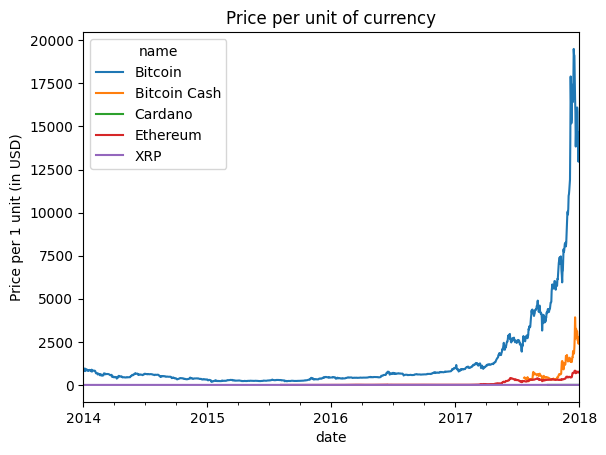

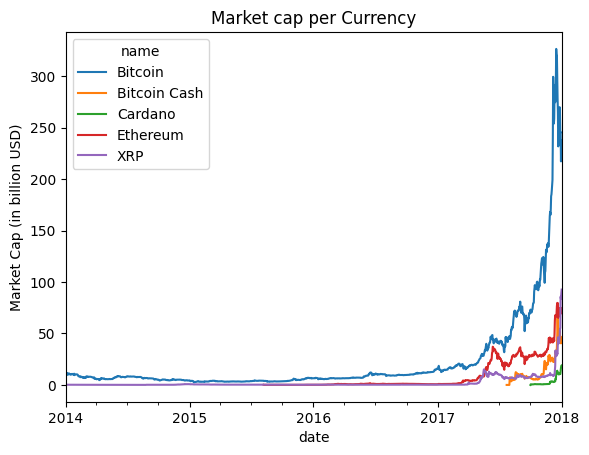

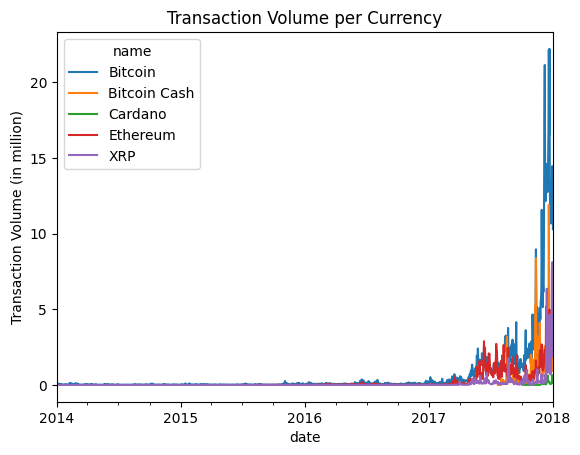

In [36]:
top_5_currency_names = df_temp.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df_temp[df_temp['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

ax = data_top_5_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

ax = data_top_5_currencies.groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency");

ax = data_top_5_currencies.groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

- Nhóm đồ thị trên đã sử dụng kĩ thuật Static layers: Superimposed Line Charts, được giới thiệu trong bài Facet: 
    - Sử dụng kĩ thuật này để hiển thị toàn bộ 5 đường tương ứng với 5 loại tiền ảo vào cùng một khung đồ thị (xét trong cùng một khung thời gian như nhau đối với từng loại tiền ảo).
    - Khi đó, sẽ có cái nhìn trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh 5 loại tiền ảo với nhau, điều này sẽ khó có được hiển thị từng đường cho từng loại tiền ảo trên một khung đồ thị riêng biệt. Từ đó, dễ dàng hơn trong việc đưa ra đánh giá.


    
- Nhận xét:
    - Về Giá của mỗi đơn vị tiền tệ: tiền ảo Bitcoin luôn có giá trị cao nhất và trong giai đoạn nửa cuối năm 2017 - đầu năm 2018, giá của Bitcoin cao hơn hẳn các loại tiền còn lại, thậm chí có lúc cao hơn gấp gần 4 lần so với đồng tiền đứng thứ hai.
    - Về Giới hạn thị trường: tương tự như giá, về giới hạn thị trường Bitcoin vẫn luôn dẫn đầu, trong giai đoạn nửa cuối năm 2017 - đầu năm 2018, giới hạn thị trường của Bitcoin cao hơn hẳn các loại tiền còn lại, thậm chí có lúc cao hơn gấp gần 3 lần so với đồng tiền đứng thứ hai.
    - Về Khối lượng giao dịch: giai đoạn từ 2014 đến nửa đầu 2017, khối lượng giao dịch của tất cả các loại tiền ảo đều gần như bằng 0. Sang nửa cuối năm 2017 - đầu năm 2018 khối lượng giao dịch tăng lên rõ rệt, đứng đầu là Bitcoin với khối lượng giao dịch đứng đầu.

    => Từ đó, ta thấy giai đoạn từ 2014 đến nửa đầu 2017 thị trường tiền ảo chưa phát triển, nhưng sang giai đoạn nửa cuối năm 2017 - đầu năm 2018 là giai đoạn bùng nổ của thị trường tiền ảo: tiền ảo có giá trị hơn, lượng giao dịch lớn mỗi ngày, đặc biệt là sự tăng trưởng mạnh mẽ của tiền ảo Bitcoin.


### Vấn đề thứ hai